# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [34]:
#import the libraries
import pandas as pd
import numpy as np



In [35]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("./googleplaystore_v2.csv")
inp0.head(20)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [36]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [37]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [38]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [41]:
#Drop the rows having null values in the Rating field
inp1= inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [42]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [43]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1[inp1['Android Ver'].isnull()]


App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [44]:
#Inspect the nulls in the Android Version column


In [45]:
#Drop the row having shifted values
inp1.loc[10472, :] 
inp1=inp1[~(inp1['Android Ver'].isnull() & (inp1.Category=="1.9"))]


In [46]:
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [47]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()
            #Or
inp1['Android Ver'].mode()

0    4.1 and up
dtype: object

In [48]:
#Fill up the nulls in the Android Version column with the above value
mode=inp1['Android Ver'].mode()[0] 
inp1['Android Ver']=inp1['Android Ver'].fillna(mode)

In [49]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [50]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [51]:
#Check the most common value in the Current version column
print(print(inp1['Current Ver'].value_counts()))
current_mode=inp1['Current Ver'].mode()[0]
print(current_mode)

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.7.24.2018              1
4.8.7.8                  1
1.0.0.10                 1
5.6.2 (US)               1
8.07.021                 1
Name: Current Ver, Length: 2638, dtype: int64
None
Varies with device


In [52]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver']=inp1['Current Ver'].fillna(current_mode)

In [53]:
# Question : Check the most common value in the Current version column again
print(print(inp1['Current Ver'].value_counts()))

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.7.24.2018              1
4.8.7.8                  1
1.0.0.10                 1
5.6.2 (US)               1
8.07.021                 1
Name: Current Ver, Length: 2638, dtype: int64
None


#### Handling Incorrect Data Types 

In [54]:
#Check the datatypes of all the columns 
inp1.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5 non-null      object 
 1   Category        5 non-null      object 
 2   Rating          5 non-null      float64
 3   Reviews         5 non-null      object 
 4   Size            5 non-null      float64
 5   Installs        5 non-null      object 
 6   Type            5 non-null      object 
 7   Price           5 non-null      object 
 8   Content Rating  5 non-null      object 
 9   Genres          5 non-null      object 
 10  Last Updated    5 non-null      object 
 11  Current Ver     5 non-null      object 
 12  Android Ver     5 non-null      object 
dtypes: float64(2), object(11)
memory usage: 560.0+ bytes


In [55]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
#You will get an error because price is not in integer format

avg= inp1.groupby('Android Ver')['Price'].mean()
print(avg['4.1 and up'])

DataError: No numeric types to aggregate

In [56]:
#Analyse the Price column to check the issue

inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$3.04         1
$1.75         1
$1.29         1
$389.99       1
$39.99        1
Name: Price, Length: 73, dtype: int64

In [57]:
#Write the function to make the changes

inp1.Price=inp1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))
inp1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [58]:
#Verify the dtype of Price once again
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [59]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

2           83
3           78
5           74
4           74
1           67
            ..
22429716     1
43645        1
2794         1
3116         1
3989         1
Name: Reviews, Length: 5992, dtype: int64

In [60]:
#Change the dtype of this column
inp1.Reviews= inp1.Reviews.astype("int32")

#Check the quantitative spread of this dataframe


inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [61]:
#Analyse the Installs Column

inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [62]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

inp1["Installs"]=inp1["Installs"].apply(lambda x : int(str(x).replace(',','').replace('+','')))
inp1[inp1["Android Ver"]=="4.1 and up"].describe()

Rating       Reviews           Size      Installs        Price
count  2061.000000  2.061000e+03    2061.000000  2.061000e+03  2061.000000
mean      4.252256  6.088288e+05   27452.430038  1.490628e+07     0.819161
std       0.507211  3.155634e+06   24272.241097  6.915728e+07    15.331929
min       1.000000  1.000000e+00      24.000000  5.000000e+00     0.000000
25%       4.100000  1.710000e+02    8600.000000  1.000000e+04     0.000000
50%       4.300000  6.011000e+03   21000.000000  5.000000e+05     0.000000
75%       4.500000  9.812300e+04   39000.000000  5.000000e+06     0.000000
max       5.000000  4.489389e+07  100000.000000  1.000000e+09   400.000000

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [63]:
#Perform the sanity checks on the Reviews column
print(inp1['Rating'].describe())
#Perform the sanity checks on the Reviews column

inp1[(inp1.Reviews) > (inp1.Installs)]
inp1=inp1[(inp1.Reviews) <=(inp1.Installs)]
inp1[(inp1.Reviews) > (inp1.Installs)].shape
print(inp1['Price'].describe())

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


In [64]:
#perform the sanity checks on prices of free apps 
#perform the sanity checks on prices of free apps 
inp1[(inp1.Type=='Free') &(inp1.Price > 0)]


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [65]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline




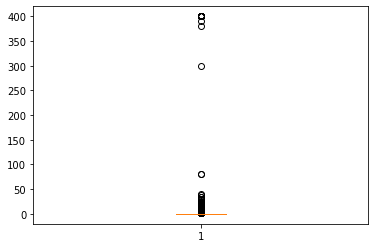

In [66]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [67]:
#Check the apps with price more than 200
inp1[inp1['Price'] > 200]
inp1=inp1[inp1['Price'] <200]
inp1.Price.describe()


count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

(9338,)

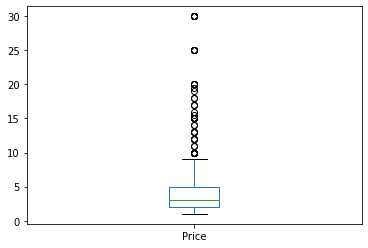

In [68]:
#Clean the Price column

inp1[inp1.Price > 30]
inp1=inp1[inp1['Price'] <30]
inp1[inp1.Price > 0].Price.plot.box()
inp1.Price.shape
#Panda series also has a box plot which is used above

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9338 non-null   object 
 1   Category        9338 non-null   object 
 2   Rating          9338 non-null   float64
 3   Reviews         9338 non-null   int32  
 4   Size            9338 non-null   float64
 5   Installs        9338 non-null   int64  
 6   Type            9338 non-null   object 
 7   Price           9338 non-null   float64
 8   Content Rating  9338 non-null   object 
 9   Genres          9338 non-null   object 
 10  Last Updated    9338 non-null   object 
 11  Current Ver     9338 non-null   object 
 12  Android Ver     9338 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 984.9+ KB


<AxesSubplot:>

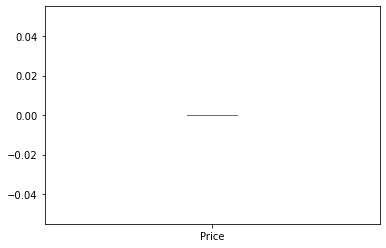

In [69]:
#Create a box plot for paid apps
inp1.info()
inp1[inp1.Type == 'Free'].Price.plot.box()

In [70]:
#Check the apps with price more than 30
inp1[inp1['Price'] > 30]


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [71]:
#Clean the Price column again


### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

(array([9.212e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

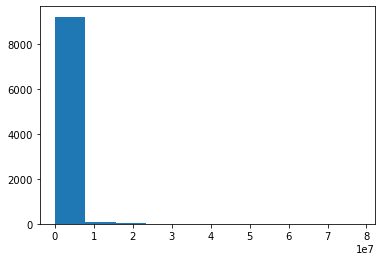

In [72]:
#Create a histogram of the Reviews
?plt.hist 
#gives a documentation
#Create a histogram of the Reviews
inp1.Reviews.describe()
plt.hist(inp1.Reviews)




{'whiskers': [<matplotlib.lines.Line2D at 0x7fb307d084f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb307eae070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb307d08070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb307ce4190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb307e32e80>],
 'means': []}

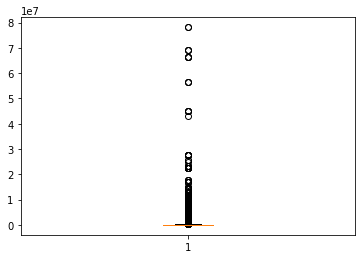

In [73]:

plt.boxplot(inp1.Reviews)

In [74]:
#Check records with 1 million reviews
inp1[inp1["Reviews"] >=1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [75]:
#Drop the above records
inp1=inp1[inp1["Reviews"] <=1000000]
inp1.shape

(8634, 13)

(array([7168.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

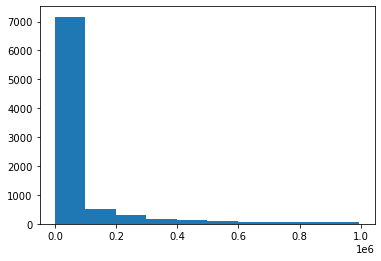

In [76]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

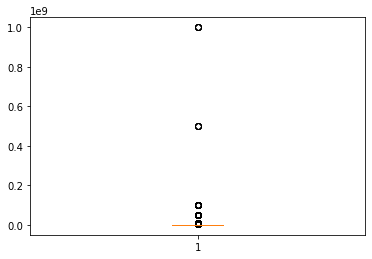

In [77]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
inp1.Installs.describe()



In [78]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1=inp1[inp1["Installs"] < 100000000]
inp1.Installs.shape

(8573,)

(array([7159.,  519.,  312.,  165.,  121.,  110.,   59.,   45.,   41.,
          42.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

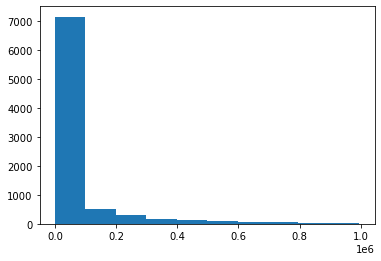

In [79]:
plt.hist(inp1.Reviews)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8573 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8573 non-null   object 
 1   Category        8573 non-null   object 
 2   Rating          8573 non-null   float64
 3   Reviews         8573 non-null   int32  
 4   Size            8573 non-null   float64
 5   Installs        8573 non-null   int64  
 6   Type            8573 non-null   object 
 7   Price           8573 non-null   float64
 8   Content Rating  8573 non-null   object 
 9   Genres          8573 non-null   object 
 10  Last Updated    8573 non-null   object 
 11  Current Ver     8573 non-null   object 
 12  Android Ver     8573 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 904.2+ KB


(array([3216., 1348., 2190.,  562.,  422.,  269.,  177.,  126.,  106.,
         157.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

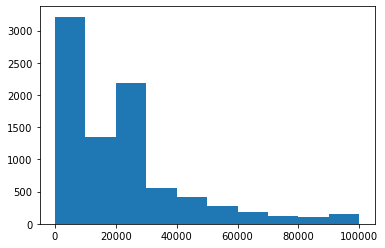

In [80]:
#Plot a histogram for Size as well.
inp1.info()
plt.hist(inp1.Size)

count      8573.000000
mean      21625.064264
std       20712.753555
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

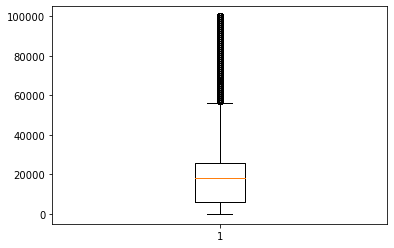

In [81]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
inp1.Size.describe()

In [82]:
A Histogram plots the frequency of a numeric variable, whereas the Bar plot shows the aggregation of a certain numerical entity for some categorical variable. In Situation A, you are analysing the total sum of runs, which is a numeric variable for all the teams, which is a categorical variable. Hence it will need a bar plot. For Situation B, you're understanding the spread of a numeric variable by checking the frequency. Hence a histogram will be used here.

SyntaxError: invalid syntax (1602778292.py, line 1)

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [83]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

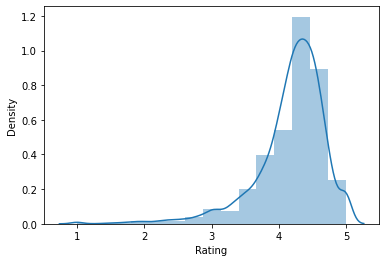

In [84]:
#Create a distribution plot for rating
import seaborn as sns
sns.distplot(inp1.Rating,bins=15)
%config IPCompleter.greedy=True

<AxesSubplot:xlabel='Rating', ylabel='Density'>

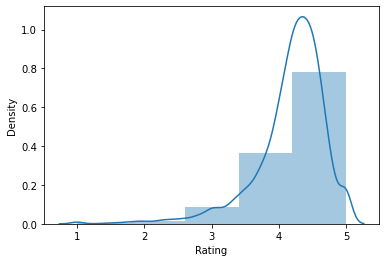

In [85]:
#Change the number of bin
sns.distplot(inp1.Rating, bins=5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

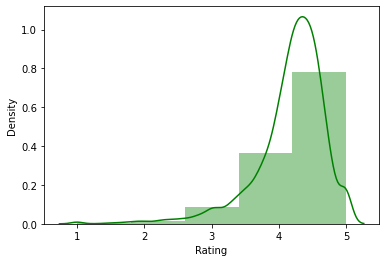

In [86]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=5,color="g")

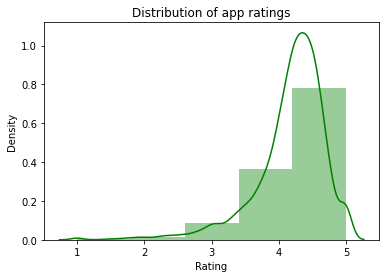

In [87]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins=5,color="g")
plt.title("Distribution of app ratings")
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [88]:
#Check all the styling options
?sns.set_style

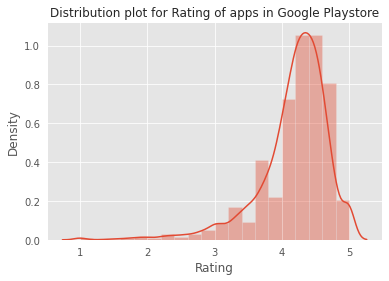

In [89]:
#Change the number of bins to 20
sns.set_style("white")
plt.style.use('ggplot')
sns.distplot(inp1.Rating, bins=20)
plt.title("Distribution plot for Rating of apps in Google Playstore", fontsize=12)

plt.show()


In [90]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [91]:
#Analyse the Content Rating column
inp1.info()
inp1['Content Rating'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8573 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8573 non-null   object 
 1   Category        8573 non-null   object 
 2   Rating          8573 non-null   float64
 3   Reviews         8573 non-null   int32  
 4   Size            8573 non-null   float64
 5   Installs        8573 non-null   int64  
 6   Type            8573 non-null   object 
 7   Price           8573 non-null   float64
 8   Content Rating  8573 non-null   object 
 9   Genres          8573 non-null   object 
 10  Last Updated    8573 non-null   object 
 11  Current Ver     8573 non-null   object 
 12  Android Ver     8573 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 904.2+ KB


Everyone           6898
Teen                918
Mature 17+          417
Everyone 10+        336
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [92]:
#Remove the rows with values which are less represented 
inp1=inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]


In [93]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)

In [94]:
#Check the apps belonging to different categories of Content Rating 
inp1['Content Rating'].value_counts()

Everyone        6898
Teen             918
Mature 17+       417
Everyone 10+     336
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

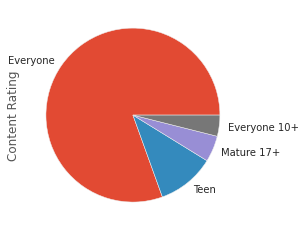

In [95]:
#Plot a pie chart

inp1['Content Rating'].value_counts().plot.pie()

<AxesSubplot:>

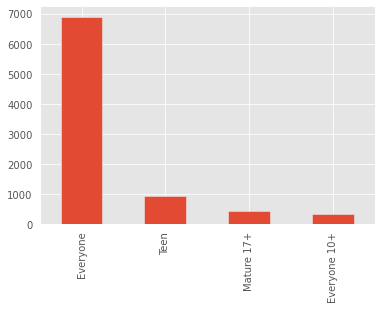

In [96]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()


<AxesSubplot:>

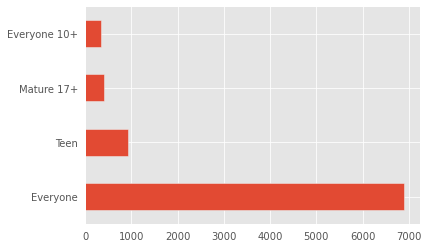

In [97]:
#Horizontal bar charts
inp1['Content Rating'].value_counts().plot.barh()

<AxesSubplot:>

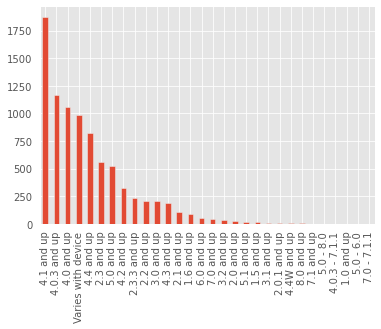

In [98]:
#Question - Plot a bar plot for checking the 4th highest Android version type

inp1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

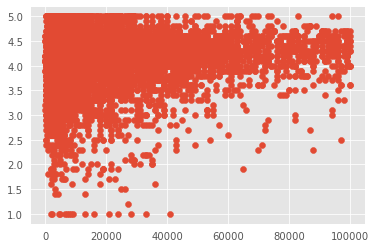

In [99]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
import scipy.stats as stats


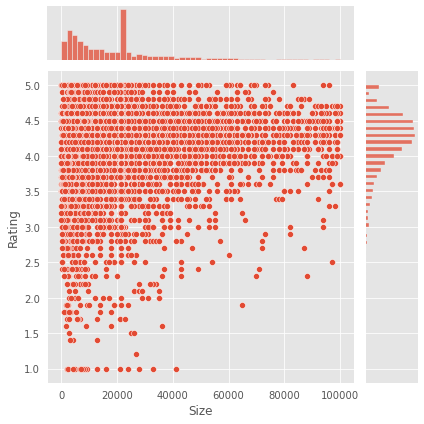

In [100]:
### Plot the same thing now using a jointplot

sns.jointplot(inp1.Size, inp1.Rating)


<AxesSubplot:xlabel='Size', ylabel='Rating'>

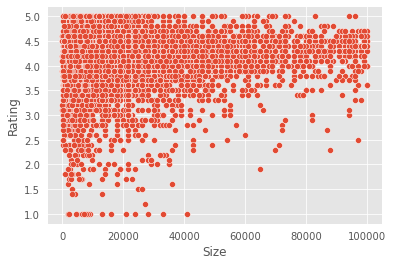

In [101]:
sns.scatterplot(inp1.Size, inp1.Rating)

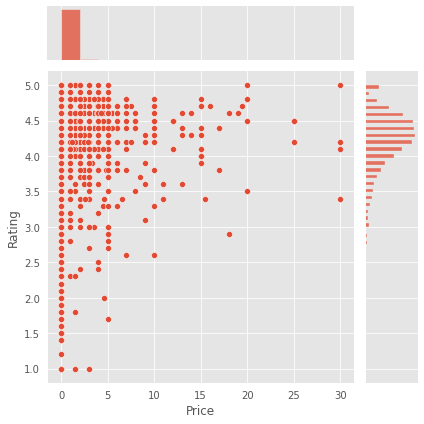

In [102]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price, inp1.Rating)

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

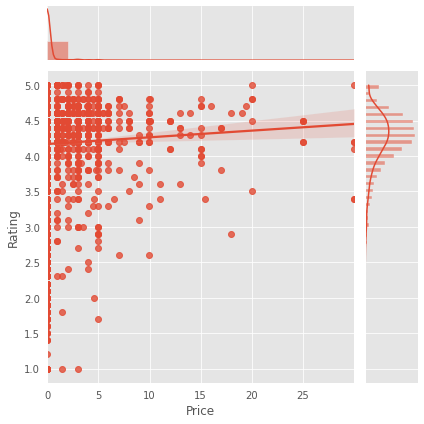

In [103]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating, kind="reg")
plt.show()

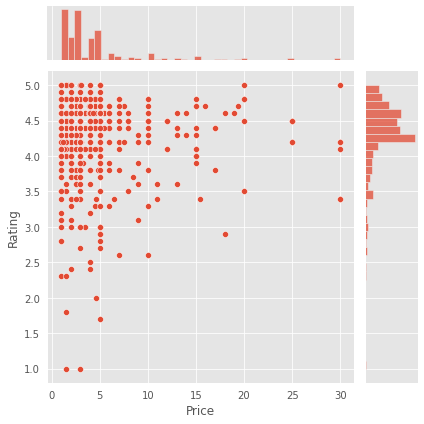

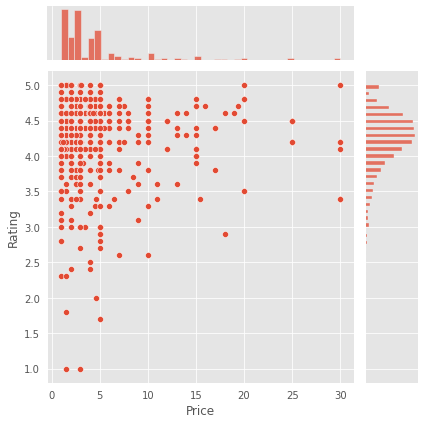

In [104]:
sns.jointplot('Price', 'Rating', data=inp1[(inp1['Price'] > 0)]) 
#What is done here is that we are passing column name for x and y axes and passing the data (dataFrame) separately. 
#So, seaborn will take the DF and from that DF, it will plaot the joint plot for Price and Rating.

#OR

sns.jointplot(inp1[(inp1.Price > 0)].Price, inp1.Rating)

In [105]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

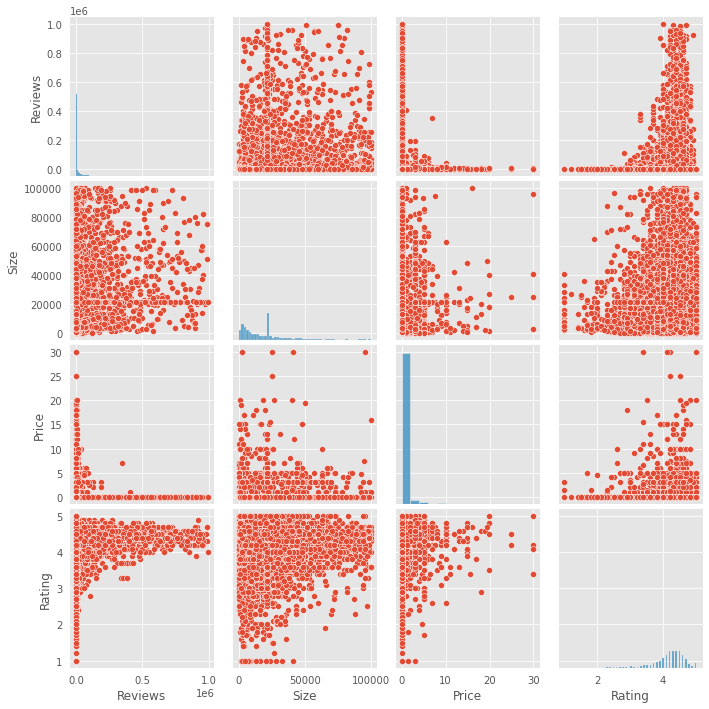

In [106]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[['Reviews','Size', 'Price', 'Rating']])

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

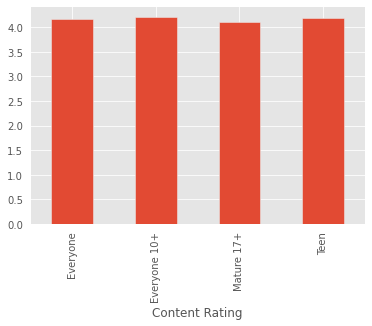

In [107]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

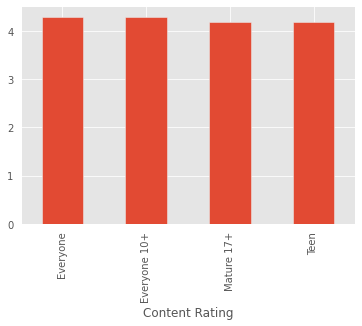

In [108]:
####Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

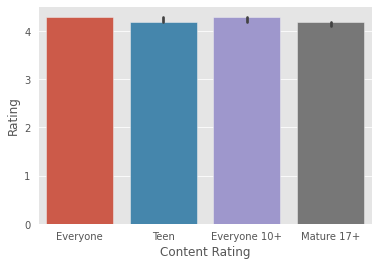

In [109]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp1, x='Content Rating', y="Rating", estimator=np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

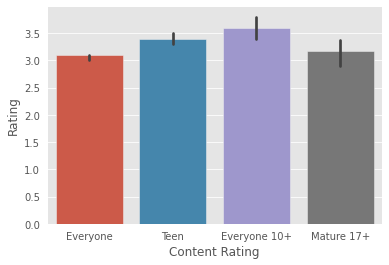

In [110]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x='Content Rating', y="Rating", estimator=lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

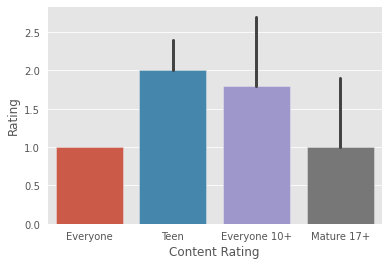

In [111]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x='Content Rating', y="Rating", estimator=lambda x:np.quantile(x,0.0))
sns.barplot(data=inp1, x='Content Rating', y="Rating", estimator=np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




count    8569.000000
mean        4.172202
std         0.530606
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

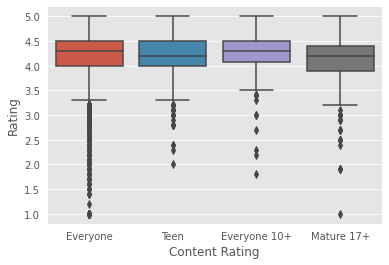

In [152]:
##Plot a box plot of Rating vs Content Rating

sns.boxplot(inp1['Content Rating'],inp1.Rating)
inp1.Rating.describe()

<AxesSubplot:xlabel='Rating'>

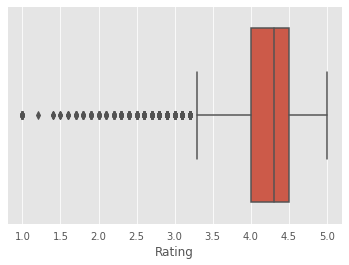

In [113]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp1.Rating)

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

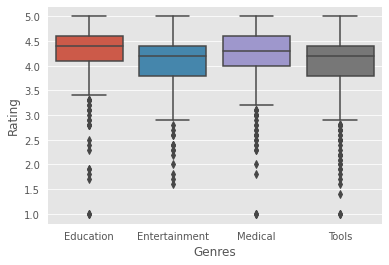

In [114]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres

inp1.Genres.value_counts()
sns.boxplot(inp1[inp1.Genres.isin(["Tools","Entertainment","Education","Medical"])]["Genres"], inp1.Rating)

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [115]:
##Ratings vs Size vs Content Rating


##Prepare buckets for the Size column using pd.qcut
inp1['Size_Bucket']=pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])
inp1.head()




App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Size_Bucket  
0  4.0.3 and up           M  
1  4.0.3 and up           M  
2  4.0.3 and up           L  
3    4.2 and up           H  
4    4.4 and up          VL

In [116]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating

pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.116677  4.158290  4.215450  4.170994  4.187102
Everyone 10+    4.188889  4.207143  4.238318  4.193443  4.216393
Mature 17+      3.951429  4.129592  4.021705  4.155172  4.193814
Teen            4.220213  4.208511  4.141637  4.198131  4.246102

In [117]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket      VL    L    M    H   VH
Content Rating                         
Everyone        4.2  4.3  4.3  4.3  4.3
Everyone 10+    4.1  4.3  4.3  4.3  4.3
Mature 17+      4.2  4.2  4.1  4.1  4.2
Teen            4.3  4.3  4.2  4.2  4.3

In [118]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.84  3.94  4.1  4.0  4.0
Mature 17+      3.28  3.64  3.7  3.9  4.0
Teen            3.86  3.80  3.9  4.0  4.0

In [119]:
##Store the pivot table in a separate variable
res=pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=lambda x: np.quantile(x, 0.2))

<AxesSubplot:xlabel='Size_Bucket', ylabel='Content Rating'>

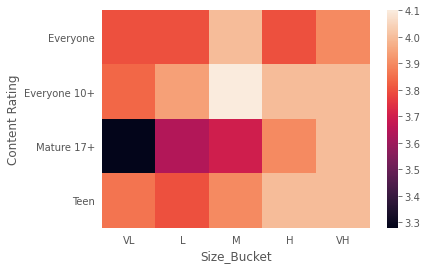

In [122]:
##Plot a heat map
sns.heatmap(res)

<AxesSubplot:xlabel='Size_Bucket', ylabel='Content Rating'>

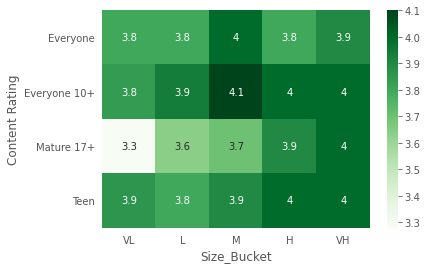

In [123]:
##Apply customisations
sns.heatmap(res,cmap="Greens" , annot=True)

<AxesSubplot:xlabel='Review_Bucket', ylabel='Content Rating'>

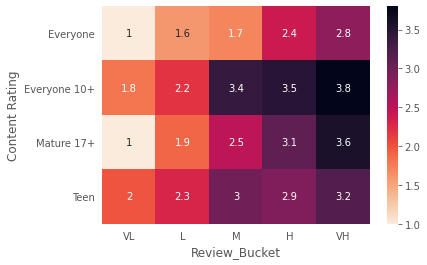

In [125]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp1["Review_Bucket"] = pd.qcut(inp1.Reviews,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])
inp3 = pd.pivot_table(data=inp1, index="Content Rating", columns="Review_Bucket", values="Rating", aggfunc=np.min)
sns.heatmap(inp3,cmap="rocket_r",annot=True)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [137]:
## Extract the month from the Last Updated Date
inp1.dtypes
inp1['Last Updated'].head()
inp1['Updated Month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [139]:
## Find the average Rating across all the months
inp1.groupby(['Updated Month']).Rating.mean()


Updated Month
1     4.145050
2     4.090385
3     4.107963
4     4.148326
5     4.153894
6     4.172865
7     4.222399
8     4.270607
9     4.041406
10    4.012739
11    4.102020
12    4.064939
Name: Rating, dtype: float64

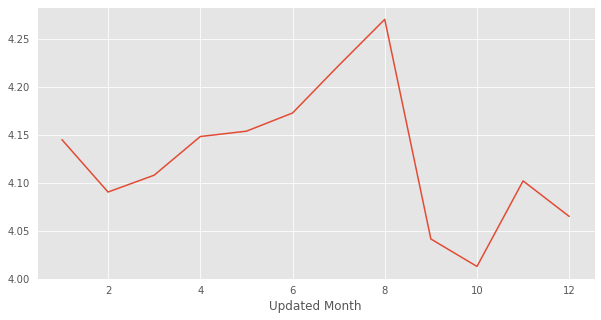

In [141]:
## to change figure size
plt.figure(figsize=[10,5])
## Plot a line graph
inp1.groupby(['Updated Month']).Rating.mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [142]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs

pd.pivot_table(data=inp1, index="Updated Month", values="Installs", columns="Content Rating",aggfunc=sum)

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
Updated Month                                                   
1                725387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               1461067800     118173500    50140100   202689600
6               2127170505     217727100   145257200   415716600
7               6371109680     456556000   419491910  1143556800
8               4430943320     215821000   312981700  1057855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               525424710      60310000     1070100    31261100
12               467105770       8410000    12960100    51707100

In [146]:
##Store the table in a separate variable
plt.figure(figsize=[10,6])
monthly=pd.pivot_table(data=inp1, index="Updated Month", values="Installs", columns="Content Rating",aggfunc=sum)

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Updated Month'>

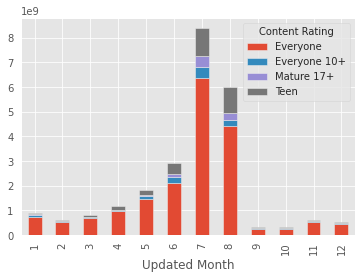

In [147]:
##Plot the stacked bar chart.
monthly.plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Updated Month'>

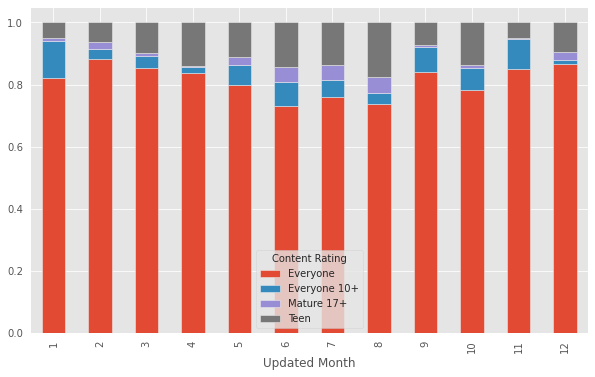

In [150]:
##Plot the stacked bar chart again wrt to the proportions.

##Get Proportions/perc instead of absolute values

monthly_propos=monthly[["Everyone","Everyone 10+", "Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1)
monthly_propos.plot(kind='bar', stacked=True, figsize=[10,6])

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [158]:
#Install plotly
rs1=inp1.groupby(["Updated Month"])[['Rating']].mean()


In [159]:
#Take the table you want to plot in a separate variable
rs1.reset_index(inplace=True)

In [160]:
#Import the plotly libraries
import plotly.express as px
px.line(rs1,x="Updated Month", y="Rating", title="Monthly Average Ratings")

In [ ]:
#Prepare the plot
